In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

file_path = "/kaggle/input/final-dataset/Final_Dataset.csv"
df = pd.read_csv(file_path)
print(df)



     Day      Time  Solar irradiance(W/m2)  Ambient temperature  \
0      1   9:00:00                     660                32.14   
1      1   9:15:00                     698                32.94   
2      1   9:30:00                     736                33.64   
3      1   9:45:00                     774                34.44   
4      1  10:00:00                     812                37.14   
..   ...       ...                     ...                  ...   
143    4  17:00:00                     181                38.11   
144    4  17:15:00                     167                37.31   
145    4  17:30:00                     153                36.61   
146    4  17:45:00                     139                36.11   
147    4  18:00:00                       2                34.11   

     Inner glass temperature  Outer glass temperature  \
0                       35.0                     33.0   
1                       36.8                     33.8   
2                       

In [2]:
import pandas as pd

df['Time'] = df['Time'].astype(str)
df['Time'] = df['Time'].apply(lambda t: round(int(t.split(':')[0]) + int(t.split(':')[1]) / 60, 2))
df['Day'] = df['Day'].astype(float)
print(df.head())


   Day   Time  Solar irradiance(W/m2)  Ambient temperature  \
0  1.0   9.00                     660                32.14   
1  1.0   9.25                     698                32.94   
2  1.0   9.50                     736                33.64   
3  1.0   9.75                     774                34.44   
4  1.0  10.00                     812                37.14   

   Inner glass temperature  Outer glass temperature  Basin water temperature  \
0                     35.0                     33.0                     43.0   
1                     36.8                     33.8                     44.5   
2                     38.5                     34.5                     46.0   
3                     40.3                     35.3                     47.5   
4                     42.0                     38.0                     50.0   

   Fresh water production (ml)  Accumulated output (ml)  Mw (L)  mw(L/m2)  \
0                          2.0                      2.0   0.002     0

In [3]:
filtered_df = df[df['Time'] % 1 == 0].reset_index(drop=True)

print(filtered_df.head())

   Day  Time  Solar irradiance(W/m2)  Ambient temperature  \
0  1.0   9.0                     660                32.14   
1  1.0  10.0                     812                37.14   
2  1.0  11.0                     902                41.14   
3  1.0  12.0                     945                45.14   
4  1.0  13.0                     911                43.14   

   Inner glass temperature  Outer glass temperature  Basin water temperature  \
0                     35.0                     33.0                     43.0   
1                     42.0                     38.0                     50.0   
2                     47.5                     42.0                     66.0   
3                     53.0                     46.0                     71.0   
4                     51.0                     44.0                     68.0   

   Fresh water production (ml)  Accumulated output (ml)  Mw (L)  mw(L/m2)  \
0                          2.0                      2.0   0.002     0.008  

In [4]:
filtered_df.columns = filtered_df.columns.str.strip()

cols_to_augment = [
    'Solar irradiance(W/m2)', 'Ambient temperature', 'Inner glass temperature',
    'Outer glass temperature', 'Basin water temperature',
    'Fresh water production (ml)', 'Mw (L)', 'mw(L/m2)', 'Ti'
]

augmented_data = []

for i in range(len(filtered_df) - 1):
    current_row = filtered_df.iloc[i]
    next_row = filtered_df.iloc[i + 1]
    
    augmented_data.append(current_row.to_dict())
    
    if current_row['Day'] == next_row['Day'] and next_row['Time'] == current_row['Time'] + 1:
        split_rows = []
        for col in cols_to_augment:
            if 9 <= current_row['Time'] < 12:
                intermediate_vals = sorted(np.random.uniform(current_row[col], next_row[col], 3))
            elif 12 <= current_row['Time'] < 18:
                intermediate_vals = sorted(np.random.uniform(next_row[col], current_row[col], 3), reverse=True)
            else:
                intermediate_vals = sorted(np.random.uniform(current_row[col], next_row[col], 3))
            for j in range(3):
                if len(split_rows) <= j:
                    split_rows.append({'Day': current_row['Day'], 'Time': round(current_row['Time'] + (j + 1) * 0.25, 2)})
                split_rows[j][col] = round(intermediate_vals[j], 2)
        
        augmented_data.extend(split_rows)

augmented_data.append(filtered_df.iloc[-1].to_dict())

augmented_df = pd.DataFrame(augmented_data)
augmented_df = augmented_df.sort_values(by=['Day', 'Time']).reset_index(drop=True)

print(augmented_df.head())

   Day   Time  Solar irradiance(W/m2)  Ambient temperature  \
0  1.0   9.00                  660.00                32.14   
1  1.0   9.25                  684.22                34.13   
2  1.0   9.50                  685.55                36.67   
3  1.0   9.75                  809.85                36.99   
4  1.0  10.00                  812.00                37.14   

   Inner glass temperature  Outer glass temperature  Basin water temperature  \
0                    35.00                    33.00                    43.00   
1                    36.50                    35.78                    43.04   
2                    38.45                    37.82                    43.08   
3                    41.94                    37.87                    48.59   
4                    42.00                    38.00                    50.00   

   Fresh water production (ml)  Accumulated output (ml)  Mw (L)  mw(L/m2)  \
0                         2.00                      2.0   0.002     0

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
columns_to_drop = [
    'Hfg (J/kg)', 'Area (m2)', 'Thermal energy efficiency',
    'Exergy out Exout (Watt)', 'Exergy input Exin (Watt)',
    'En, out', 'Hourly exergy efficiency', 'Accumulated output (ml)'
]

augmented_df = augmented_df.drop(columns=columns_to_drop, errors='ignore')
print(augmented_df.head())

   Day   Time  Solar irradiance(W/m2)  Ambient temperature  \
0  1.0   9.00                  660.00                32.14   
1  1.0   9.25                  684.22                34.13   
2  1.0   9.50                  685.55                36.67   
3  1.0   9.75                  809.85                36.99   
4  1.0  10.00                  812.00                37.14   

   Inner glass temperature  Outer glass temperature  Basin water temperature  \
0                    35.00                    33.00                    43.00   
1                    36.50                    35.78                    43.04   
2                    38.45                    37.82                    43.08   
3                    41.94                    37.87                    48.59   
4                    42.00                    38.00                    50.00   

   Fresh water production (ml)  Mw (L)  mw(L/m2)      Ti  
0                         2.00   0.002     0.008  312.15  
1                         4.

In [6]:
df.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Ambient temperature',
       'Inner glass temperature', 'Outer glass temperature',
       'Basin water temperature', 'Fresh water production (ml)',
       'Accumulated output (ml)', 'Mw (L)', 'mw(L/m2)', 'Ti', 'Hfg (J/kg)',
       'Area (m2)', 'Thermal energy efficiency', 'Exergy out Exout (Watt)',
       'Exergy input Exin (Watt)', 'En, out', 'Hourly exergy efficiency'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()

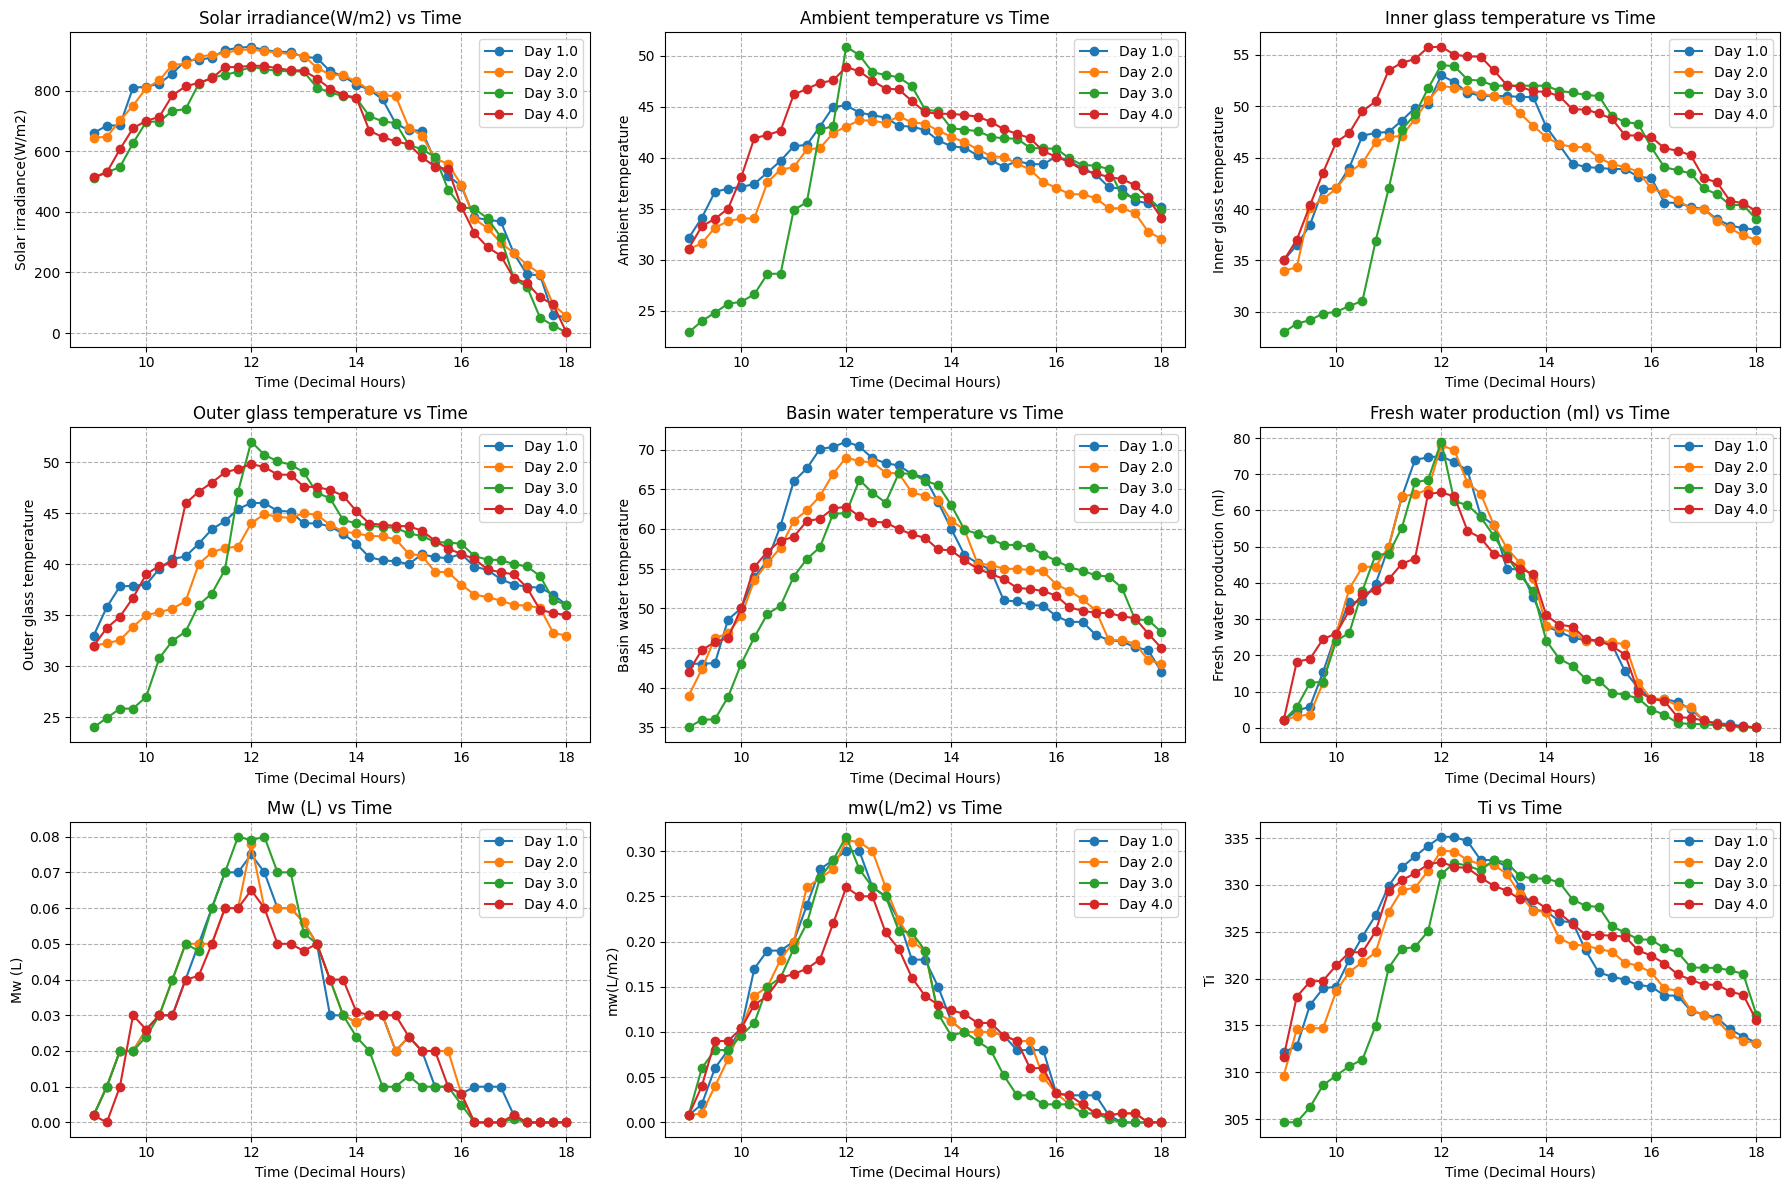

In [8]:
import matplotlib.pyplot as plt
import math

features = [
    'Solar irradiance(W/m2)', 'Ambient temperature', 'Inner glass temperature',
    'Outer glass temperature', 'Basin water temperature', 'Fresh water production (ml)',
    'Mw (L)', 'mw(L/m2)', 'Ti'
]

n = len(features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    for day in augmented_df['Day'].unique():
        day_data = augmented_df[augmented_df['Day'] == day]
        plt.plot(day_data['Time'], day_data[feature], marker='o', linestyle='-', label=f'Day {day}')
    plt.xlabel('Time (Decimal Hours)')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Time')
    plt.grid(True, linestyle='--')
    plt.legend()

plt.tight_layout()
plt.show()


In [9]:
day1_mw = augmented_df[augmented_df['Day'] == 1][['Time', 'Mw (L)']]
print(day1_mw)


     Time  Mw (L)
0    9.00  0.0020
1    9.25  0.0100
2    9.50  0.0200
3    9.75  0.0200
4   10.00  0.0260
5   10.25  0.0300
6   10.50  0.0300
7   10.75  0.0400
8   11.00  0.0500
9   11.25  0.0600
10  11.50  0.0700
11  11.75  0.0700
12  12.00  0.0750
13  12.25  0.0700
14  12.50  0.0600
15  12.75  0.0600
16  13.00  0.0560
17  13.25  0.0500
18  13.50  0.0300
19  13.75  0.0300
20  14.00  0.0280
21  14.25  0.0300
22  14.50  0.0300
23  14.75  0.0200
24  15.00  0.0240
25  15.25  0.0200
26  15.50  0.0100
27  15.75  0.0100
28  16.00  0.0080
29  16.25  0.0100
30  16.50  0.0100
31  16.75  0.0100
32  17.00  0.0020
33  17.25  0.0000
34  17.50  0.0000
35  17.75  0.0000
36  18.00  0.0001


In [10]:
mw_df = augmented_df[['Day','Time', 'Mw (L)']]
print(mw_df)

     Day   Time  Mw (L)
0    1.0   9.00  0.0020
1    1.0   9.25  0.0100
2    1.0   9.50  0.0200
3    1.0   9.75  0.0200
4    1.0  10.00  0.0260
..   ...    ...     ...
143  4.0  17.00  0.0020
144  4.0  17.25  0.0000
145  4.0  17.50  0.0000
146  4.0  17.75  0.0000
147  4.0  18.00  0.0001

[148 rows x 3 columns]


In [11]:
mw_df_filtered = mw_df[mw_df['Time'] % 1 == 0].reset_index(drop=True)
print(mw_df_filtered)

    Day  Time   Mw (L)
0   1.0   9.0  0.00200
1   1.0  10.0  0.02600
2   1.0  11.0  0.05000
3   1.0  12.0  0.07500
4   1.0  13.0  0.05600
5   1.0  14.0  0.02800
6   1.0  15.0  0.02400
7   1.0  16.0  0.00800
8   1.0  17.0  0.00200
9   1.0  18.0  0.00010
10  2.0   9.0  0.00200
11  2.0  10.0  0.02600
12  2.0  11.0  0.05000
13  2.0  12.0  0.07800
14  2.0  13.0  0.05600
15  2.0  14.0  0.02800
16  2.0  15.0  0.02400
17  2.0  16.0  0.00800
18  2.0  17.0  0.00200
19  2.0  18.0  0.00010
20  3.0   9.0  0.00200
21  3.0  10.0  0.02400
22  3.0  11.0  0.04800
23  3.0  12.0  0.07900
24  3.0  13.0  0.05300
25  3.0  14.0  0.02400
26  3.0  15.0  0.01300
27  3.0  16.0  0.00500
28  3.0  17.0  0.00100
29  3.0  18.0  0.00008
30  4.0   9.0  0.00200
31  4.0  10.0  0.02600
32  4.0  11.0  0.04100
33  4.0  12.0  0.06500
34  4.0  13.0  0.04800
35  4.0  14.0  0.03100
36  4.0  15.0  0.02400
37  4.0  16.0  0.00800
38  4.0  17.0  0.00200
39  4.0  18.0  0.00010


In [12]:
import pandas as pd
import numpy as np

mw_df_filtered['Time'] = mw_df_filtered['Time'].apply(lambda t: t.hour + t.minute / 60 if hasattr(t, 'hour') else t)

augmented_data = []

for i in range(len(mw_df_filtered) - 1):
    current_row = mw_df_filtered.iloc[i]
    next_row = mw_df_filtered.iloc[i + 1]
    
    augmented_data.append(current_row.to_dict())
    
    if current_row['Day'] == next_row['Day'] and next_row['Time'] == current_row['Time'] + 1:
        if 9 <= current_row['Time'] < 12:
            intermediate_vals = sorted(np.random.uniform(current_row['Mw (L)'], next_row['Mw (L)'], 3))
        elif 12 <= current_row['Time'] < 18:
            intermediate_vals = sorted(np.random.uniform(next_row['Mw (L)'], current_row['Mw (L)'], 3), reverse=True)
        else:
            intermediate_vals = sorted(np.random.uniform(current_row['Mw (L)'], next_row['Mw (L)'], 3))
        
        for j in range(3):
            augmented_data.append({
                'Day': current_row['Day'],
                'Time': round(current_row['Time'] + (j + 1) * 0.25, 2),
                'Mw (L)': round(intermediate_vals[j], 5)
            })

augmented_data.append(mw_df_filtered.iloc[-1].to_dict())

mw_augmented_df = pd.DataFrame(augmented_data)
mw_augmented_df = mw_augmented_df.sort_values(by=['Day', 'Time']).reset_index(drop=True)

print(mw_augmented_df.head(20))


    Day   Time   Mw (L)
0   1.0   9.00  0.00200
1   1.0   9.25  0.00442
2   1.0   9.50  0.01466
3   1.0   9.75  0.01809
4   1.0  10.00  0.02600
5   1.0  10.25  0.03833
6   1.0  10.50  0.04238
7   1.0  10.75  0.04475
8   1.0  11.00  0.05000
9   1.0  11.25  0.05002
10  1.0  11.50  0.06224
11  1.0  11.75  0.07493
12  1.0  12.00  0.07500
13  1.0  12.25  0.07307
14  1.0  12.50  0.07019
15  1.0  12.75  0.05900
16  1.0  13.00  0.05600
17  1.0  13.25  0.05437
18  1.0  13.50  0.05177
19  1.0  13.75  0.04538


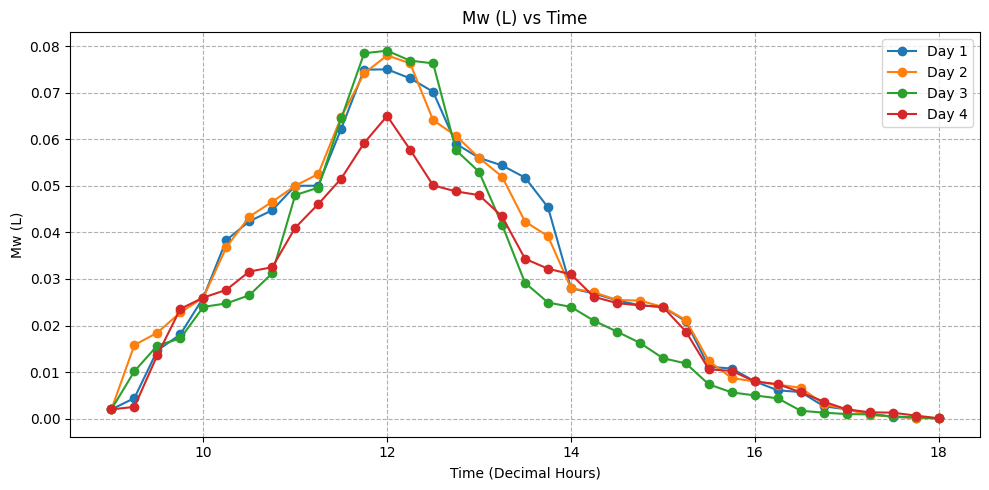

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for day in mw_augmented_df['Day'].unique():
    day_data = mw_augmented_df[mw_augmented_df['Day'] == day]
    plt.plot(day_data['Time'], day_data['Mw (L)'], marker='o', linestyle='-', label=f'Day {int(day)}')

plt.xlabel('Time (Decimal Hours)')
plt.ylabel('Mw (L)')
plt.title('Mw (L) vs Time')
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
augmented_df = augmented_df.drop(columns=['Mw (L)'], errors='ignore')
augmented_df = augmented_df.merge(
    mw_augmented_df[['Day', 'Time', 'Mw (L)']],
    on=['Day', 'Time'],
    how='left'
)


In [15]:
print(augmented_df.head(20))

    Day   Time  Solar irradiance(W/m2)  Ambient temperature  \
0   1.0   9.00                  660.00                32.14   
1   1.0   9.25                  684.22                34.13   
2   1.0   9.50                  685.55                36.67   
3   1.0   9.75                  809.85                36.99   
4   1.0  10.00                  812.00                37.14   
5   1.0  10.25                  823.07                37.45   
6   1.0  10.50                  856.18                38.57   
7   1.0  10.75                  899.39                39.71   
8   1.0  11.00                  902.00                41.14   
9   1.0  11.25                  908.40                41.28   
10  1.0  11.50                  933.60                43.06   
11  1.0  11.75                  940.78                45.00   
12  1.0  12.00                  945.00                45.14   
13  1.0  12.25                  933.48                44.44   
14  1.0  12.50                  928.44                4

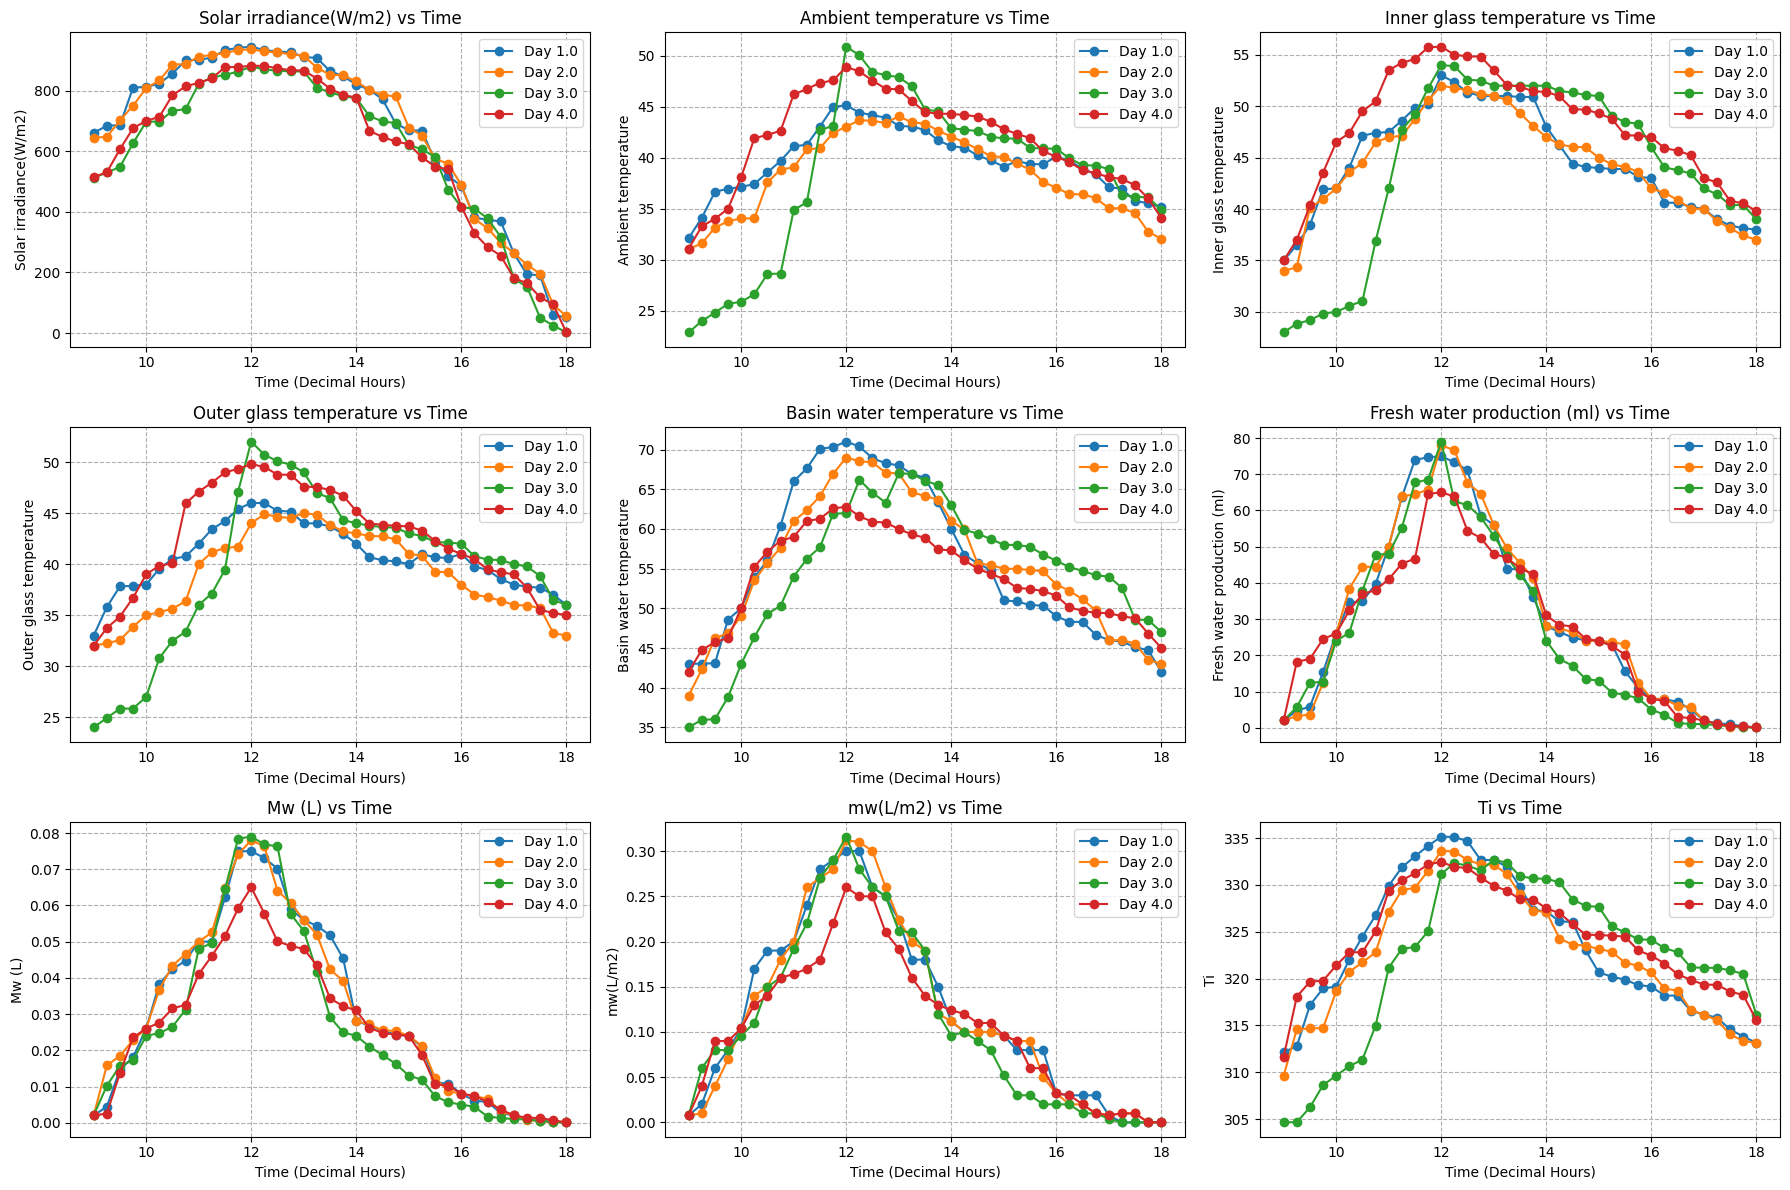

In [16]:
import matplotlib.pyplot as plt
import math

features = [
    'Solar irradiance(W/m2)', 'Ambient temperature', 'Inner glass temperature',
    'Outer glass temperature', 'Basin water temperature', 'Fresh water production (ml)',
    'Mw (L)', 'mw(L/m2)', 'Ti'
]

n = len(features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    for day in augmented_df['Day'].unique():
        day_data = augmented_df[augmented_df['Day'] == day]
        plt.plot(day_data['Time'], day_data[feature], marker='o', linestyle='-', label=f'Day {day}')
    plt.xlabel('Time (Decimal Hours)')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Time')
    plt.grid(True, linestyle='--')
    plt.legend()

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

def convert_time(t):
    try:
        if ':' in t:
            h, m = t.split(':')
            return round(int(h) + int(m) / 60, 2)
        else:
            return float(t)
    except:
        return None

df['Time'] = df['Time'].astype(str).apply(convert_time)
df['Day'] = df['Day'].astype(float)

cols_to_drop = [col for col in augmented_df.columns if 'Ambient temperature' in col or 'Area (m2)' in col]
augmented_df = augmented_df.drop(columns=cols_to_drop, errors='ignore')

extra_cols = df[['Day', 'Time', 'Ambient temperature', 'Area (m2)']]

augmented_df = pd.merge(augmented_df, extra_cols, on=['Day', 'Time'], how='left')


In [18]:
print(augmented_df)

     Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0    1.0   9.00                  660.00                    35.00   
1    1.0   9.25                  684.22                    36.50   
2    1.0   9.50                  685.55                    38.45   
3    1.0   9.75                  809.85                    41.94   
4    1.0  10.00                  812.00                    42.00   
..   ...    ...                     ...                      ...   
143  4.0  17.00                  181.00                    43.00   
144  4.0  17.25                  164.64                    42.60   
145  4.0  17.50                  117.79                    40.79   
146  4.0  17.75                   94.39                    40.56   
147  4.0  18.00                    2.00                    39.80   

     Outer glass temperature  Basin water temperature  \
0                      33.00                    43.00   
1                      35.78                    43.04   
2           

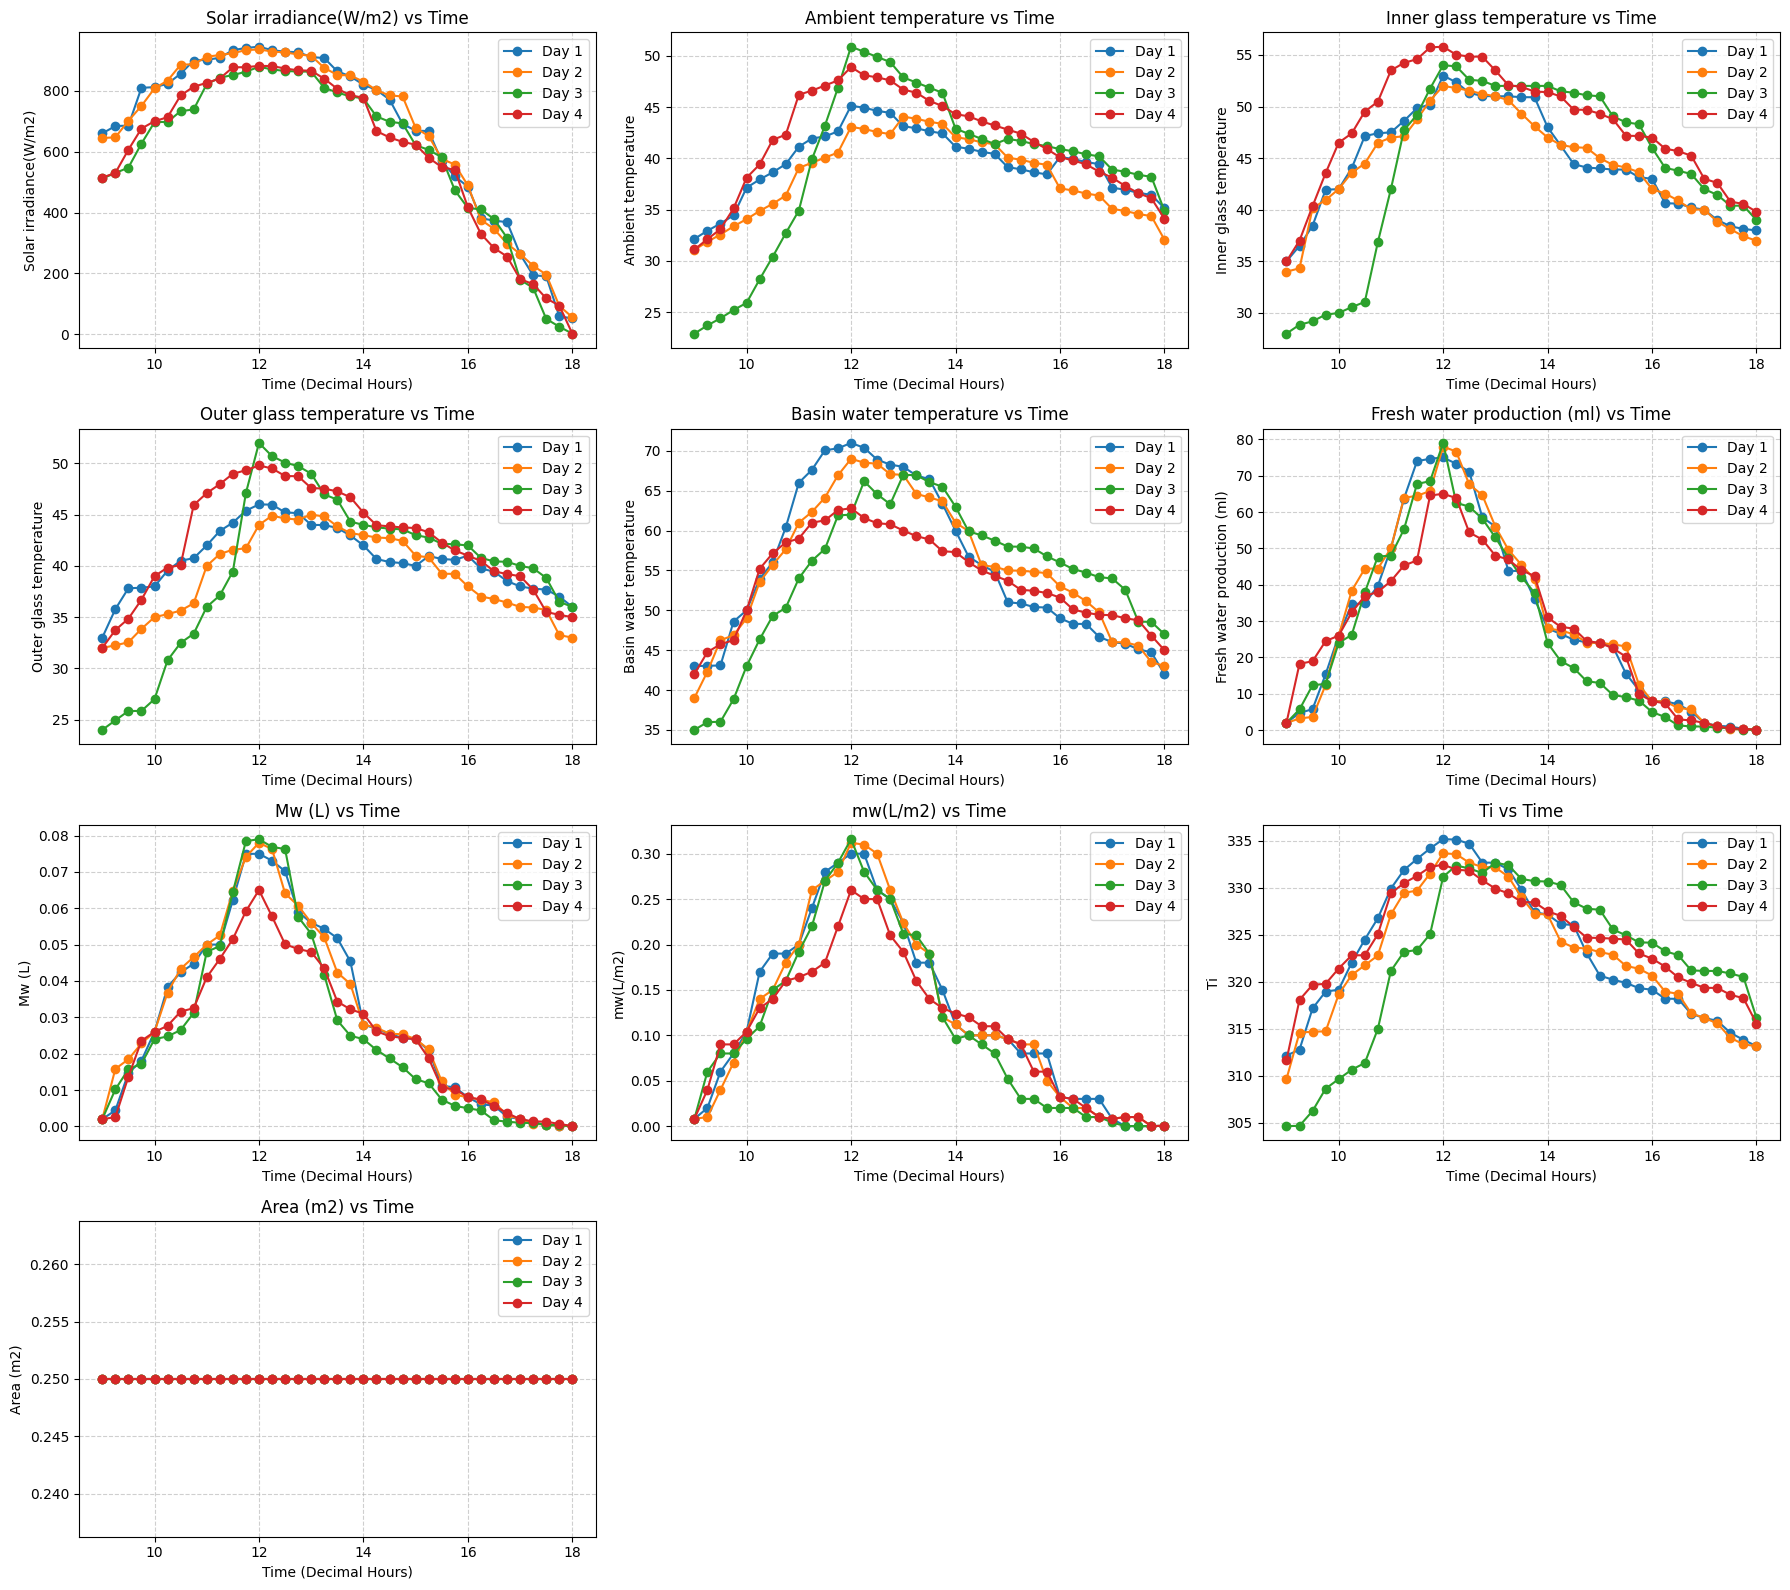

In [19]:
import matplotlib.pyplot as plt
import math

features = [
    'Solar irradiance(W/m2)', 'Ambient temperature', 'Inner glass temperature',
    'Outer glass temperature', 'Basin water temperature', 'Fresh water production (ml)',
    'Mw (L)', 'mw(L/m2)', 'Ti', 'Area (m2)'
]

n = len(features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    for day in sorted(augmented_df['Day'].unique()):
        day_data = augmented_df[augmented_df['Day'] == day]
        plt.plot(day_data['Time'], day_data[feature], marker='o', linestyle='-', label=f'Day {int(day)}')
    plt.xlabel('Time (Decimal Hours)')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Time')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

plt.tight_layout()
plt.show()


     Day   Time  Ambient temperature
0    1.0   9.00                32.14
1    1.0   9.25                32.94
2    1.0   9.50                33.64
3    1.0   9.75                34.44
4    1.0  10.00                37.14
..   ...    ...                  ...
143  4.0  17.00                38.11
144  4.0  17.25                37.31
145  4.0  17.50                36.61
146  4.0  17.75                36.11
147  4.0  18.00                34.11

[148 rows x 3 columns]
    Day  Time  Ambient temperature
0   1.0   9.0                32.14
1   1.0  10.0                37.14
2   1.0  11.0                41.14
3   1.0  12.0                45.14
4   1.0  13.0                43.14
5   1.0  14.0                41.14
6   1.0  15.0                39.14
7   1.0  16.0                40.14
8   1.0  17.0                37.14
9   1.0  18.0                35.14
10  2.0   9.0                31.07
11  2.0  10.0                34.07
12  2.0  11.0                39.07
13  2.0  12.0                43.07
14  2.0

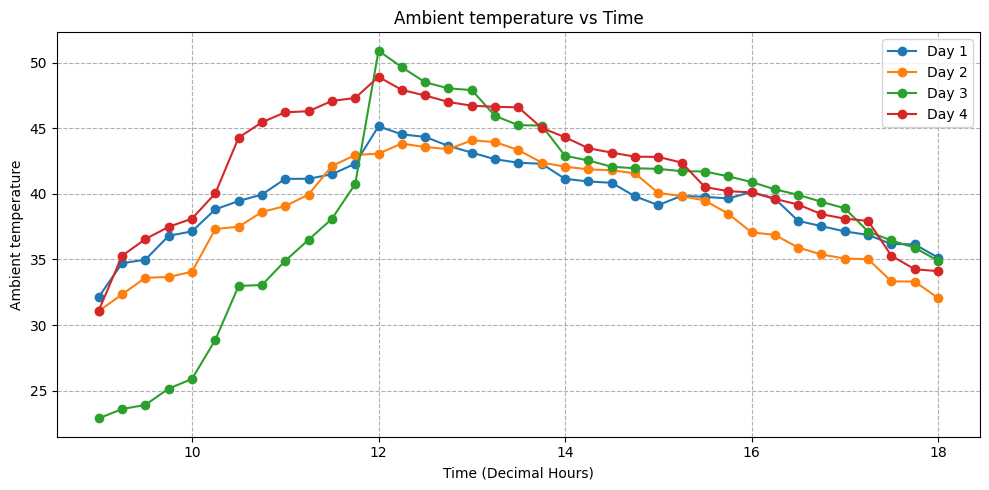

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ambient_temp_df = augmented_df[['Day', 'Time', 'Ambient temperature']]
print(ambient_temp_df)

ambient_temp_df_filtered = ambient_temp_df[ambient_temp_df['Time'] % 1 == 0].reset_index(drop=True)
print(ambient_temp_df_filtered)

ambient_temp_df_filtered['Time'] = ambient_temp_df_filtered['Time'].apply(lambda t: t.hour + t.minute / 60 if hasattr(t, 'hour') else t)

augmented_data = []

for i in range(len(ambient_temp_df_filtered) - 1):
    current_row = ambient_temp_df_filtered.iloc[i]
    next_row = ambient_temp_df_filtered.iloc[i + 1]
    
    augmented_data.append(current_row.to_dict())
    
    if current_row['Day'] == next_row['Day'] and next_row['Time'] == current_row['Time'] + 1:
        if 9 <= current_row['Time'] < 12:
            intermediate_vals = sorted(np.random.uniform(current_row['Ambient temperature'], next_row['Ambient temperature'], 3))
        elif 12 <= current_row['Time'] < 18:
            intermediate_vals = sorted(np.random.uniform(next_row['Ambient temperature'], current_row['Ambient temperature'], 3), reverse=True)
        else:
            intermediate_vals = sorted(np.random.uniform(current_row['Ambient temperature'], next_row['Ambient temperature'], 3))
        
        for j in range(3):
            augmented_data.append({
                'Day': current_row['Day'],
                'Time': round(current_row['Time'] + (j + 1) * 0.25, 2),
                'Ambient temperature': round(intermediate_vals[j], 5)
            })

augmented_data.append(ambient_temp_df_filtered.iloc[-1].to_dict())

ambient_temp_augmented_df = pd.DataFrame(augmented_data)
ambient_temp_augmented_df = ambient_temp_augmented_df.sort_values(by=['Day', 'Time']).reset_index(drop=True)

print(ambient_temp_augmented_df.head(20))

plt.figure(figsize=(10, 5))

for day in ambient_temp_augmented_df['Day'].unique():
    day_data = ambient_temp_augmented_df[ambient_temp_augmented_df['Day'] == day]
    plt.plot(day_data['Time'], day_data['Ambient temperature'], marker='o', linestyle='-', label=f'Day {int(day)}')

plt.xlabel('Time (Decimal Hours)')
plt.ylabel('Ambient temperature')
plt.title('Ambient temperature vs Time')
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# Drop 'Ambient temperature' column if it exists in augmented_df
if 'Ambient temperature' in augmented_df.columns:
    augmented_df = augmented_df.drop(columns=['Ambient temperature'])

# Add 'Ambient temperature' from ambient_temp_augmented_df
augmented_df = augmented_df.merge(ambient_temp_augmented_df[['Day', 'Time', 'Ambient temperature']], 
                                   on=['Day', 'Time'], 
                                   how='left')

print(augmented_df.head(20))


    Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0   1.0   9.00                  660.00                    35.00   
1   1.0   9.25                  684.22                    36.50   
2   1.0   9.50                  685.55                    38.45   
3   1.0   9.75                  809.85                    41.94   
4   1.0  10.00                  812.00                    42.00   
5   1.0  10.25                  823.07                    44.03   
6   1.0  10.50                  856.18                    47.14   
7   1.0  10.75                  899.39                    47.41   
8   1.0  11.00                  902.00                    47.50   
9   1.0  11.25                  908.40                    48.61   
10  1.0  11.50                  933.60                    49.84   
11  1.0  11.75                  940.78                    50.19   
12  1.0  12.00                  945.00                    53.00   
13  1.0  12.25                  933.48                    52.3

In [22]:
augmented_df = augmented_df.drop(columns=['Ambient temperature_x', 'Ambient temperature_y'], errors='ignore')

print(augmented_df.head(20))


    Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0   1.0   9.00                  660.00                    35.00   
1   1.0   9.25                  684.22                    36.50   
2   1.0   9.50                  685.55                    38.45   
3   1.0   9.75                  809.85                    41.94   
4   1.0  10.00                  812.00                    42.00   
5   1.0  10.25                  823.07                    44.03   
6   1.0  10.50                  856.18                    47.14   
7   1.0  10.75                  899.39                    47.41   
8   1.0  11.00                  902.00                    47.50   
9   1.0  11.25                  908.40                    48.61   
10  1.0  11.50                  933.60                    49.84   
11  1.0  11.75                  940.78                    50.19   
12  1.0  12.00                  945.00                    53.00   
13  1.0  12.25                  933.48                    52.3

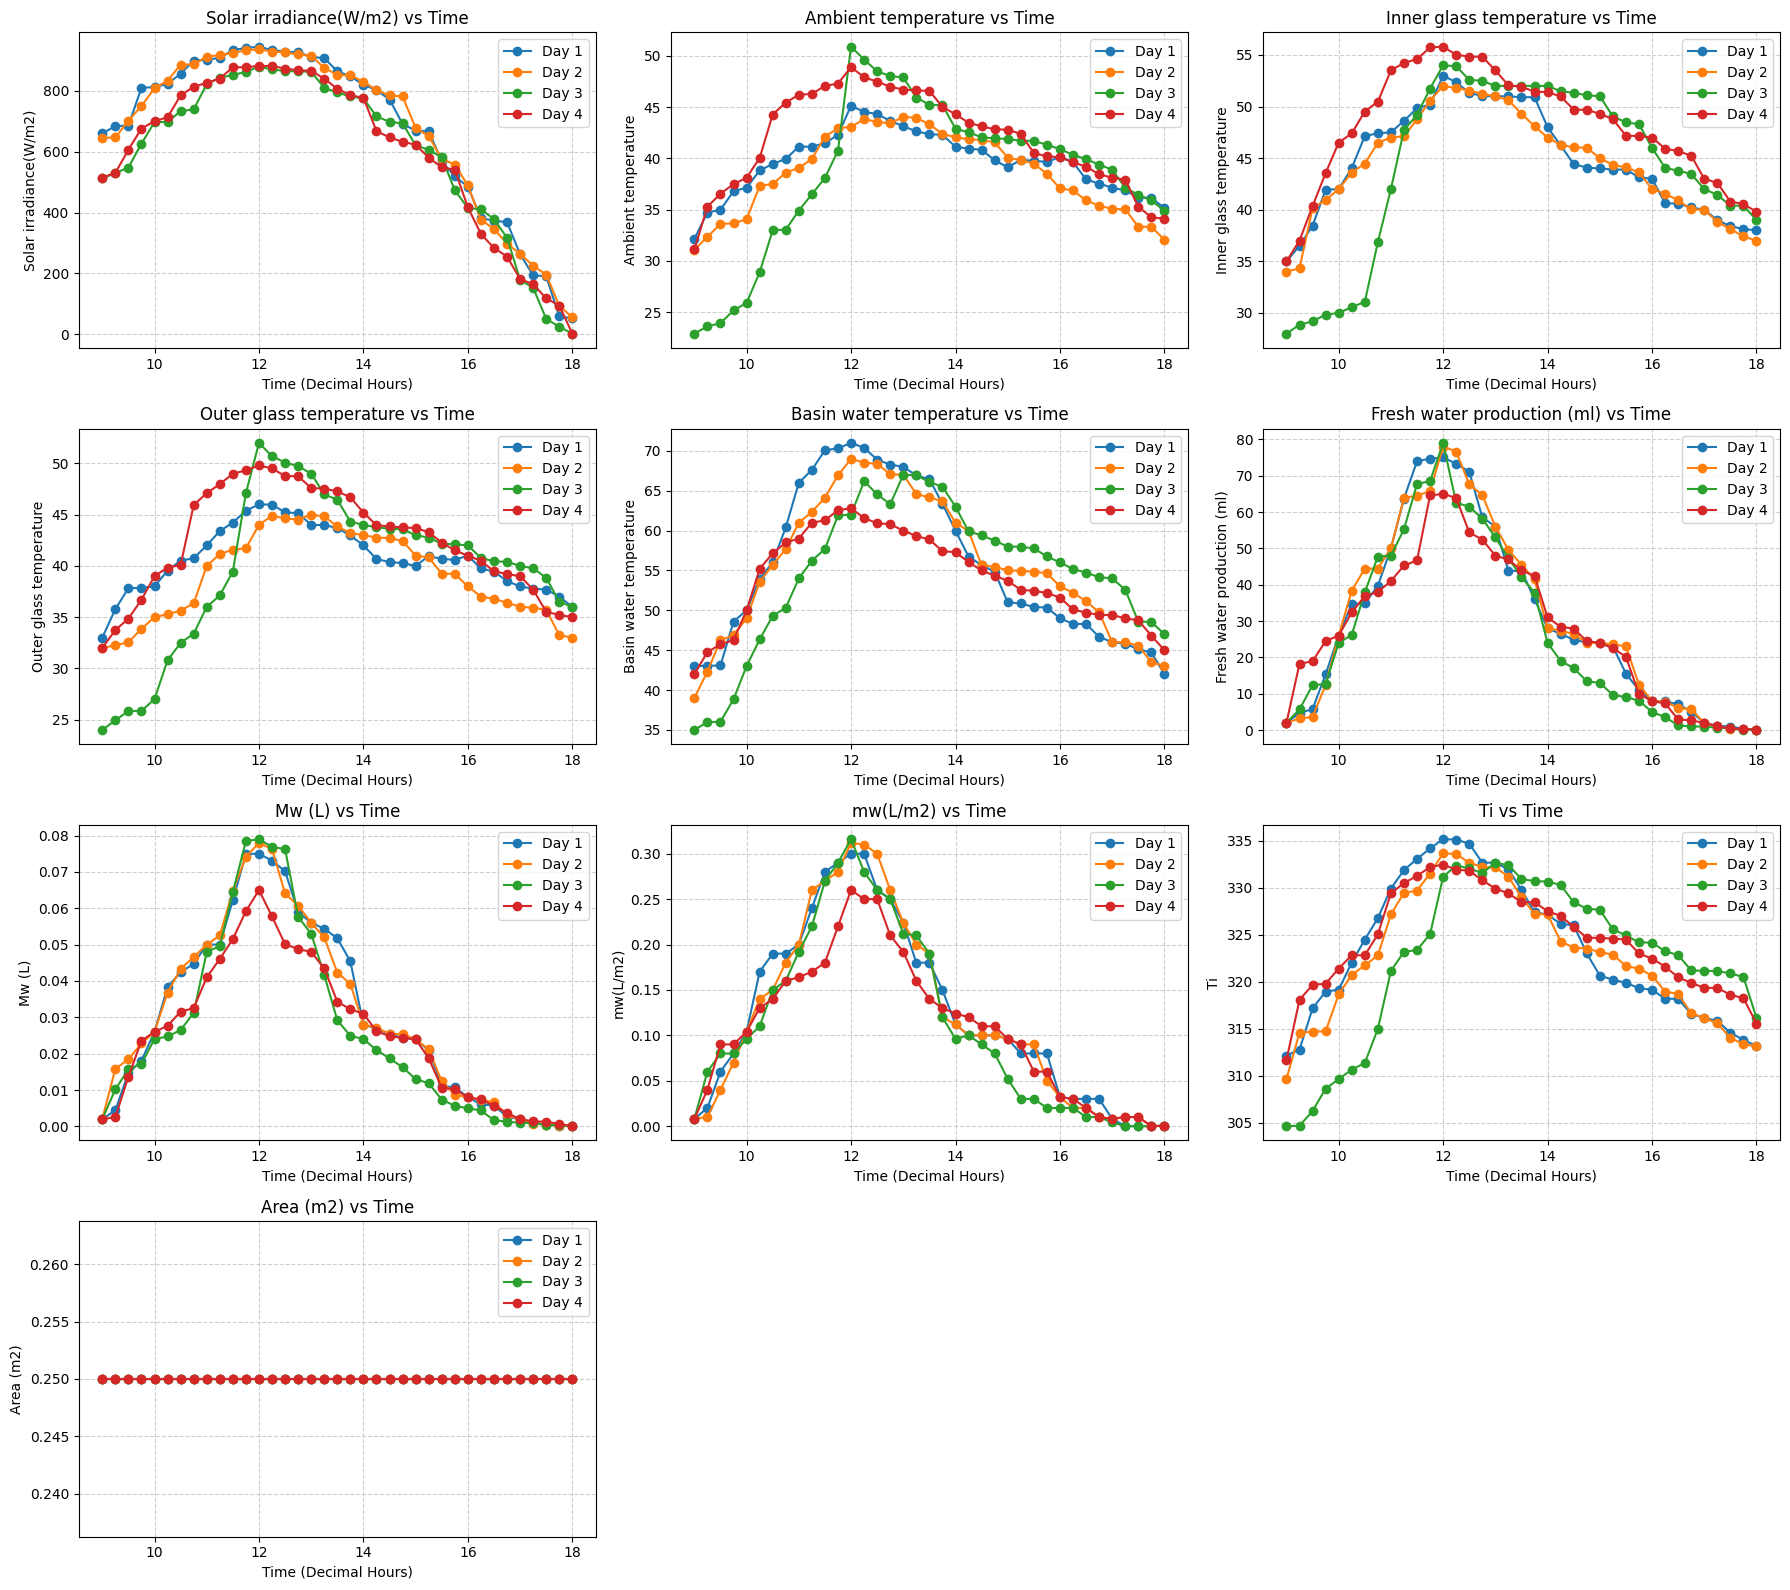

In [23]:
import matplotlib.pyplot as plt
import math

features = [
    'Solar irradiance(W/m2)', 'Ambient temperature', 'Inner glass temperature',
    'Outer glass temperature', 'Basin water temperature', 'Fresh water production (ml)',
    'Mw (L)', 'mw(L/m2)', 'Ti', 'Area (m2)'
]

n = len(features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    for day in sorted(augmented_df['Day'].unique()):
        day_data = augmented_df[augmented_df['Day'] == day]
        plt.plot(day_data['Time'], day_data[feature], marker='o', linestyle='-', label=f'Day {int(day)}')
    plt.xlabel('Time (Decimal Hours)')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Time')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

plt.tight_layout()
plt.show()


In [24]:
accumulated_output_df = df[['Day', 'Time', 'Accumulated output (ml)']]
print(accumulated_output_df)

     Day   Time  Accumulated output (ml)
0    1.0   9.00                      2.0
1    1.0   9.25                      7.0
2    1.0   9.50                     16.0
3    1.0   9.75                     28.0
4    1.0  10.00                     54.0
..   ...    ...                      ...
143  4.0  17.00                    976.0
144  4.0  17.25                    977.0
145  4.0  17.50                    977.6
146  4.0  17.75                    978.0
147  4.0  18.00                    978.1

[148 rows x 3 columns]


In [25]:
augmented_df = augmented_df.merge(accumulated_output_df, on=['Day', 'Time'], how='left')
print(augmented_df.head(20))


    Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0   1.0   9.00                  660.00                    35.00   
1   1.0   9.25                  684.22                    36.50   
2   1.0   9.50                  685.55                    38.45   
3   1.0   9.75                  809.85                    41.94   
4   1.0  10.00                  812.00                    42.00   
5   1.0  10.25                  823.07                    44.03   
6   1.0  10.50                  856.18                    47.14   
7   1.0  10.75                  899.39                    47.41   
8   1.0  11.00                  902.00                    47.50   
9   1.0  11.25                  908.40                    48.61   
10  1.0  11.50                  933.60                    49.84   
11  1.0  11.75                  940.78                    50.19   
12  1.0  12.00                  945.00                    53.00   
13  1.0  12.25                  933.48                    52.3

In [26]:
augmented_df['Mw1(L)'] = augmented_df['Fresh water production (ml)'] / 1000
augmented_df['mw1(L/m2)'] = augmented_df['Mw1(L)'] / augmented_df['Area (m2)']
print(augmented_df.head(20))

    Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0   1.0   9.00                  660.00                    35.00   
1   1.0   9.25                  684.22                    36.50   
2   1.0   9.50                  685.55                    38.45   
3   1.0   9.75                  809.85                    41.94   
4   1.0  10.00                  812.00                    42.00   
5   1.0  10.25                  823.07                    44.03   
6   1.0  10.50                  856.18                    47.14   
7   1.0  10.75                  899.39                    47.41   
8   1.0  11.00                  902.00                    47.50   
9   1.0  11.25                  908.40                    48.61   
10  1.0  11.50                  933.60                    49.84   
11  1.0  11.75                  940.78                    50.19   
12  1.0  12.00                  945.00                    53.00   
13  1.0  12.25                  933.48                    52.3

In [27]:
augmented_df.drop(columns=['mw(L/m2)', 'Mw (L)'], inplace=True)
print(augmented_df.head(20))

    Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0   1.0   9.00                  660.00                    35.00   
1   1.0   9.25                  684.22                    36.50   
2   1.0   9.50                  685.55                    38.45   
3   1.0   9.75                  809.85                    41.94   
4   1.0  10.00                  812.00                    42.00   
5   1.0  10.25                  823.07                    44.03   
6   1.0  10.50                  856.18                    47.14   
7   1.0  10.75                  899.39                    47.41   
8   1.0  11.00                  902.00                    47.50   
9   1.0  11.25                  908.40                    48.61   
10  1.0  11.50                  933.60                    49.84   
11  1.0  11.75                  940.78                    50.19   
12  1.0  12.00                  945.00                    53.00   
13  1.0  12.25                  933.48                    52.3

In [28]:
augmented_df.rename(columns={
    'Mw1(L)': 'Mw (L)',
    'mw1(L/m2)': 'mw(L/m2)'
}, inplace=True)


In [29]:
print(augmented_df.head(5))

   Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0  1.0   9.00                  660.00                    35.00   
1  1.0   9.25                  684.22                    36.50   
2  1.0   9.50                  685.55                    38.45   
3  1.0   9.75                  809.85                    41.94   
4  1.0  10.00                  812.00                    42.00   

   Outer glass temperature  Basin water temperature  \
0                    33.00                    43.00   
1                    35.78                    43.04   
2                    37.82                    43.08   
3                    37.87                    48.59   
4                    38.00                    50.00   

   Fresh water production (ml)      Ti  Area (m2)  Ambient temperature  \
0                         2.00  312.15       0.25             32.14000   
1                         4.72  312.78       0.25             34.71230   
2                         5.79  317.16       0.25 

In [30]:
augmented_df['Inner glass temperature'] += 273.15
augmented_df['Outer glass temperature'] += 273.15
augmented_df['Basin water temperature'] += 273.15
augmented_df['Ambient temperature'] += 273.15

print(augmented_df.head(5))

   Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0  1.0   9.00                  660.00                   308.15   
1  1.0   9.25                  684.22                   309.65   
2  1.0   9.50                  685.55                   311.60   
3  1.0   9.75                  809.85                   315.09   
4  1.0  10.00                  812.00                   315.15   

   Outer glass temperature  Basin water temperature  \
0                   306.15                   316.15   
1                   308.93                   316.19   
2                   310.97                   316.23   
3                   311.02                   321.74   
4                   311.15                   323.15   

   Fresh water production (ml)      Ti  Area (m2)  Ambient temperature  \
0                         2.00  312.15       0.25            305.29000   
1                         4.72  312.78       0.25            307.86230   
2                         5.79  317.16       0.25 

In [31]:
augmented_df['Ti'] = (augmented_df['Basin water temperature'] + augmented_df['Inner glass temperature']) / 2
print(augmented_df.head(5))

   Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0  1.0   9.00                  660.00                   308.15   
1  1.0   9.25                  684.22                   309.65   
2  1.0   9.50                  685.55                   311.60   
3  1.0   9.75                  809.85                   315.09   
4  1.0  10.00                  812.00                   315.15   

   Outer glass temperature  Basin water temperature  \
0                   306.15                   316.15   
1                   308.93                   316.19   
2                   310.97                   316.23   
3                   311.02                   321.74   
4                   311.15                   323.15   

   Fresh water production (ml)       Ti  Area (m2)  Ambient temperature  \
0                         2.00  312.150       0.25            305.29000   
1                         4.72  312.920       0.25            307.86230   
2                         5.79  313.915       0

In [32]:
conditions = [augmented_df['Ti'] > 343, augmented_df['Ti'] <= 343]
choices = [
    3.1615*(1e6 - 761.6*augmented_df['Ti']),
    2.4935*(1e6 - 947.79*augmented_df['Ti'] + 0.13132*augmented_df['Ti']**2 - 0.0047974*augmented_df['Ti']**3)
]
augmented_df['h_fg'] = np.select(conditions, choices)

In [33]:
print(augmented_df.head(5))

   Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0  1.0   9.00                  660.00                   308.15   
1  1.0   9.25                  684.22                   309.65   
2  1.0   9.50                  685.55                   311.60   
3  1.0   9.75                  809.85                   315.09   
4  1.0  10.00                  812.00                   315.15   

   Outer glass temperature  Basin water temperature  \
0                   306.15                   316.15   
1                   308.93                   316.19   
2                   310.97                   316.23   
3                   311.02                   321.74   
4                   311.15                   323.15   

   Fresh water production (ml)       Ti  Area (m2)  Ambient temperature  \
0                         2.00  312.150       0.25            305.29000   
1                         4.72  312.920       0.25            307.86230   
2                         5.79  313.915       0

In [34]:
delta_t = 15 * 60  # 15 minutes in seconds

augmented_df['Thermal energy efficiency'] = (
    (augmented_df['mw(L/m2)']) * augmented_df['h_fg']
) / (
    augmented_df['Solar irradiance(W/m2)'] * augmented_df['Area (m2)'] * delta_t
)

In [35]:
print(augmented_df.head(5))

   Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0  1.0   9.00                  660.00                   308.15   
1  1.0   9.25                  684.22                   309.65   
2  1.0   9.50                  685.55                   311.60   
3  1.0   9.75                  809.85                   315.09   
4  1.0  10.00                  812.00                   315.15   

   Outer glass temperature  Basin water temperature  \
0                   306.15                   316.15   
1                   308.93                   316.19   
2                   310.97                   316.23   
3                   311.02                   321.74   
4                   311.15                   323.15   

   Fresh water production (ml)       Ti  Area (m2)  Ambient temperature  \
0                         2.00  312.150       0.25            305.29000   
1                         4.72  312.920       0.25            307.86230   
2                         5.79  313.915       0

In [36]:
augmented_df.to_csv('augmented_df.csv', index=False)


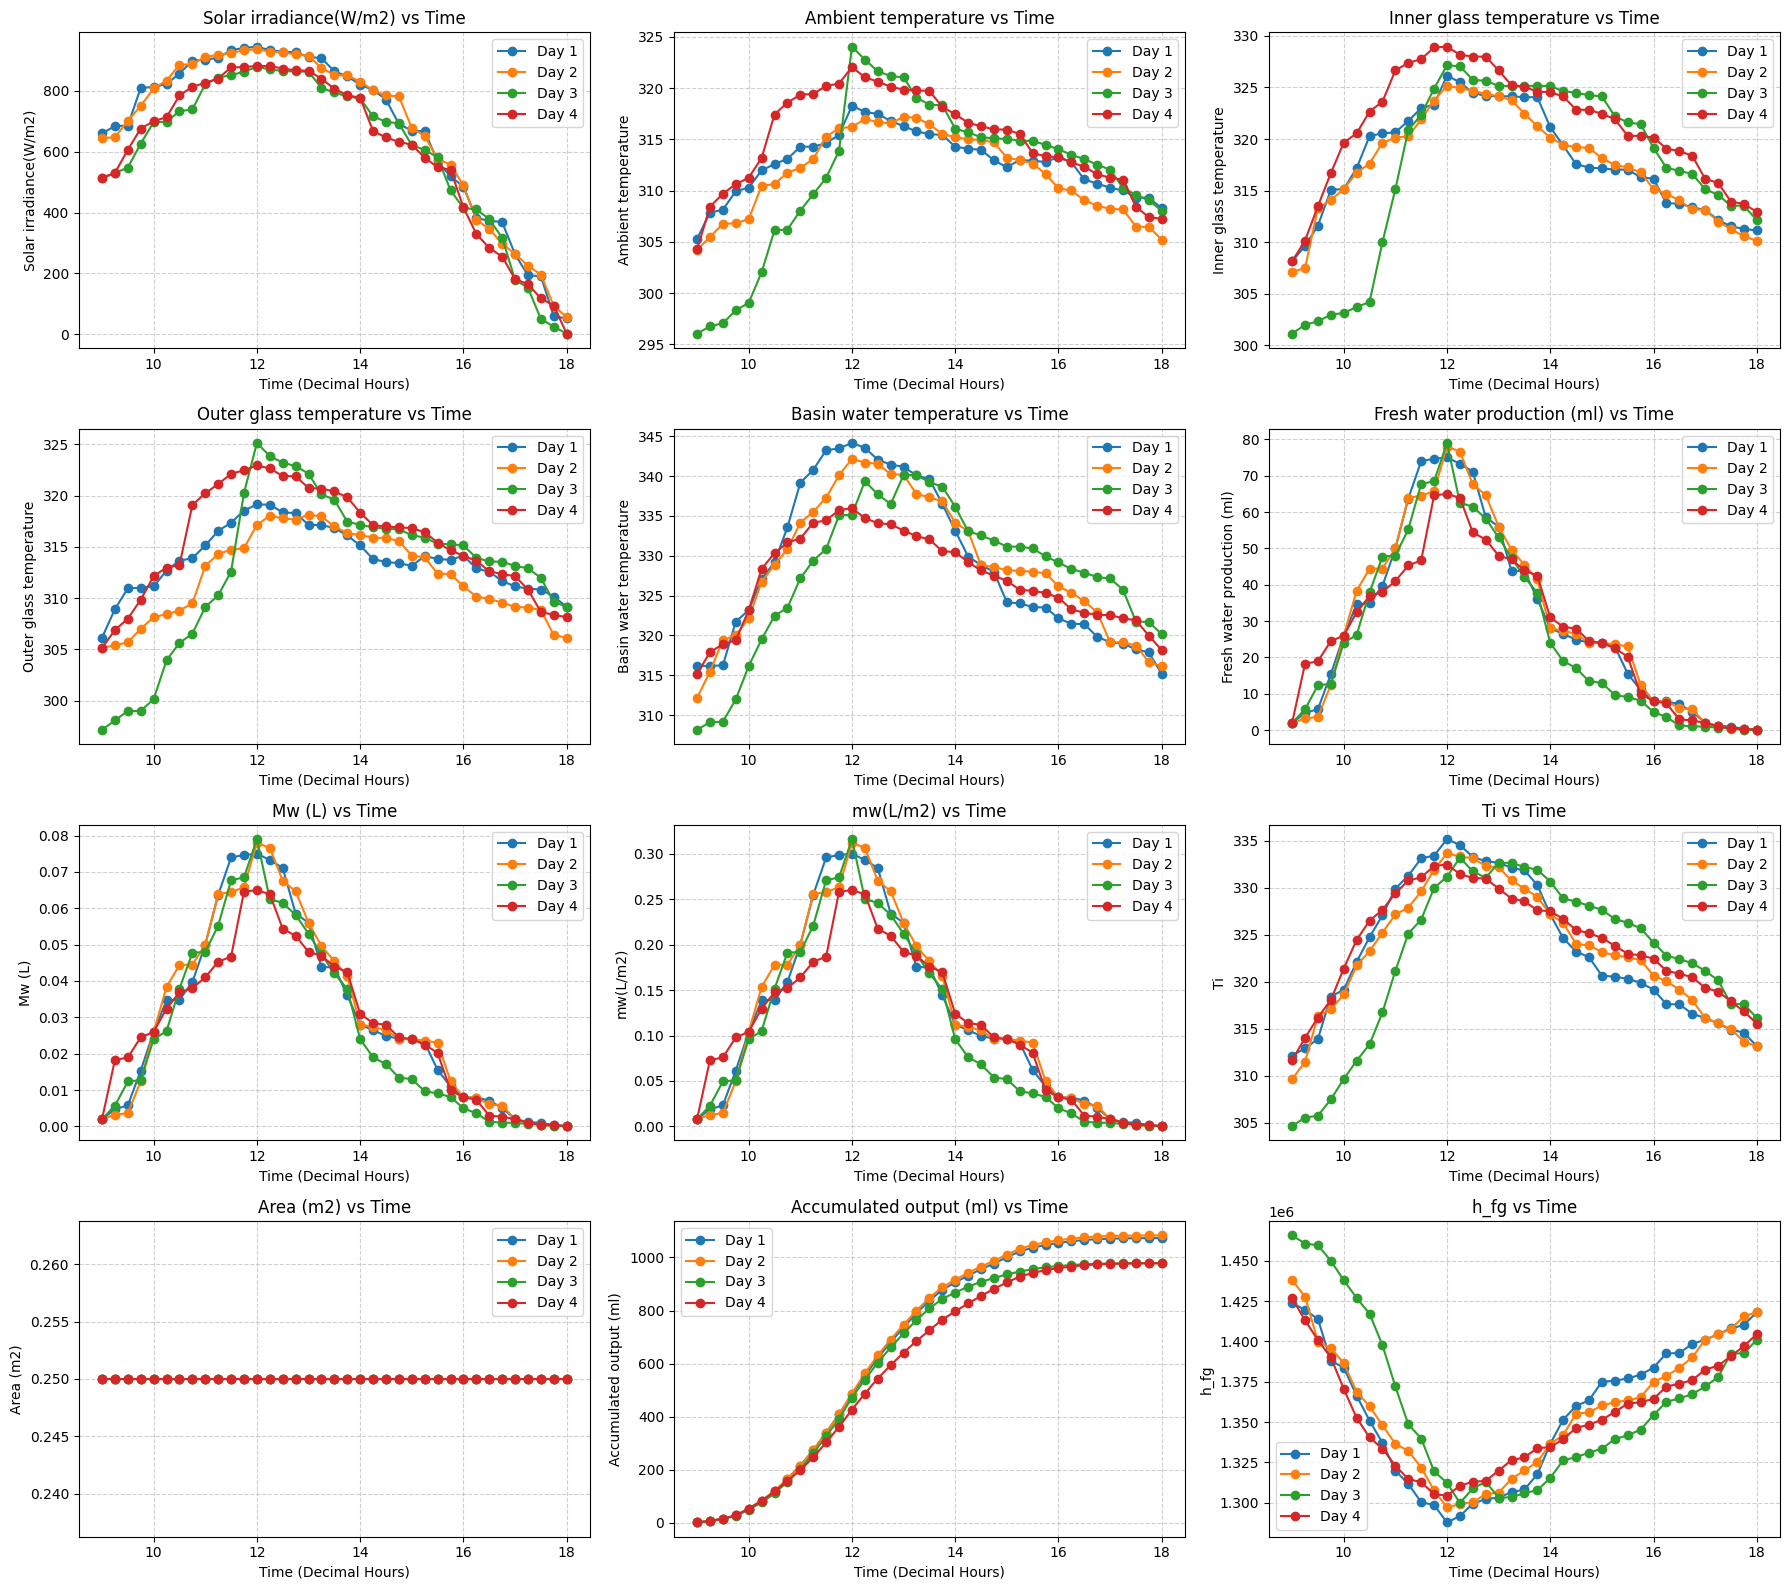

In [37]:
import matplotlib.pyplot as plt
import math

features = [
    'Solar irradiance(W/m2)', 'Ambient temperature', 'Inner glass temperature',
    'Outer glass temperature', 'Basin water temperature', 'Fresh water production (ml)',
    'Mw (L)', 'mw(L/m2)', 'Ti', 'Area (m2)', 'Accumulated output (ml)','h_fg'
]

n = len(features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    for day in sorted(augmented_df['Day'].unique()):
        day_data = augmented_df[augmented_df['Day'] == day]
        plt.plot(day_data['Time'], day_data[feature], marker='o', linestyle='-', label=f'Day {int(day)}')
    plt.xlabel('Time (Decimal Hours)')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Time')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

plt.tight_layout()
plt.show()


In [38]:
augmented_df.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature',
       'Fresh water production (ml)', 'Ti', 'Area (m2)', 'Ambient temperature',
       'Accumulated output (ml)', 'Mw (L)', 'mw(L/m2)', 'h_fg',
       'Thermal energy efficiency'],
      dtype='object')

In [39]:
print(df.head(5))

   Day   Time  Solar irradiance(W/m2)  Ambient temperature  \
0  1.0   9.00                     660                32.14   
1  1.0   9.25                     698                32.94   
2  1.0   9.50                     736                33.64   
3  1.0   9.75                     774                34.44   
4  1.0  10.00                     812                37.14   

   Inner glass temperature  Outer glass temperature  Basin water temperature  \
0                     35.0                     33.0                     43.0   
1                     36.8                     33.8                     44.5   
2                     38.5                     34.5                     46.0   
3                     40.3                     35.3                     47.5   
4                     42.0                     38.0                     50.0   

   Fresh water production (ml)  Accumulated output (ml)  Mw (L)  mw(L/m2)  \
0                          2.0                      2.0   0.002     0

In [40]:
import numpy as np

T_sun = 6000  # Sun temperature in Kelvin

# Step 1: Calculate Output Exergy (Ex_out)
augmented_df['Ex_out'] = (
    augmented_df['mw(L/m2)'] * augmented_df['h_fg'] *
    (1 - (augmented_df['Ambient temperature'] / augmented_df['Basin water temperature']))
)

# Step 2: Calculate Input Exergy (Ex_in)
temp_ratio = augmented_df['Ambient temperature'] / T_sun
augmented_df['Ex_in'] = (
    augmented_df['Solar irradiance(W/m2)'] * augmented_df['Area (m2)'] *
    (1 - (4 / 3) * temp_ratio + (1 / 3) * (temp_ratio ** 4))
)

# Step 3: Calculate Exergy Efficiency (Ex_out / Ex_in), with division protection
augmented_df['Exergy_efficiency'] = np.where(
    augmented_df['Ex_in'] > 0,
    augmented_df['Ex_out'] / augmented_df['Ex_in'],
    0
)

# Step 4: Display summary
print(augmented_df[['Ex_out', 'Ex_in', 'Exergy_efficiency']].describe())


             Ex_out       Ex_in  Exergy_efficiency
count    148.000000  148.000000         148.000000
mean    8266.617855  148.981599          44.274446
std     8300.356777   61.538998          37.080410
min       12.348172    0.465773           1.019717
25%     1268.300440  118.140118          15.540121
50%     5846.426039  163.140614          36.106340
75%    13683.798376  199.471899          66.970044
max    32056.357752  219.540399         147.669798


In [41]:
print(augmented_df.head(5))

   Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0  1.0   9.00                  660.00                   308.15   
1  1.0   9.25                  684.22                   309.65   
2  1.0   9.50                  685.55                   311.60   
3  1.0   9.75                  809.85                   315.09   
4  1.0  10.00                  812.00                   315.15   

   Outer glass temperature  Basin water temperature  \
0                   306.15                   316.15   
1                   308.93                   316.19   
2                   310.97                   316.23   
3                   311.02                   321.74   
4                   311.15                   323.15   

   Fresh water production (ml)       Ti  Area (m2)  Ambient temperature  \
0                         2.00  312.150       0.25            305.29000   
1                         4.72  312.920       0.25            307.86230   
2                         5.79  313.915       0